In [1]:
path = "C:/Users/inesm/OneDrive/Documentos/tfg/ModeloFriedkin/resultados_2025-12-09_192419/resultados.csv"

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(path)

In [7]:
df.describe()

replica    fracTrolls        lambda    rangoFinal      stdFinal  \
count  16200.000000  16200.000000  16200.000000  16200.000000  16200.000000   
mean      25.500000      0.150000      0.475000      1.464125      0.434775   
std       14.431315      0.102473      0.256182      0.492849      0.176667   
min        1.000000      0.000000      0.100000      0.154642      0.037691   
25%       13.000000      0.060000      0.250000      1.182386      0.329840   
50%       25.500000      0.150000      0.475000      1.663211      0.452907   
75%       38.000000      0.240000      0.700000      1.853366      0.573919   
max       50.000000      0.300000      0.850000      1.988899      0.741540   

        medianFinal     meanFinal       propNeg    medianNorm           NDI  \
count  16200.000000  16200.000000  16200.000000  16200.000000  16200.000000   
mean       0.289865      0.142602      0.150441      0.331462    115.779592   
std        0.271634      0.307193      0.291943      0.257355     77.927461   
min       -0.683761     -0.707931      0.000000     -0.582688      0.708494   
25%        0.170046     -0.049079      0.000000      0.234835     52.855826   
50%        0.388972      0.157978      0.009524      0.446398    107.928124   
75%        0.489939      0.392875      0.109649      0.511153    171.672877   
max        0.574547      0.573867      1.000000      0.574547    323.765059   

              resid         tconv   rho_lambdaW          nSCC  
count  1.620000e+04  16200.000000  16200.000000  16200.000000  
mean   5.767939e-07     18.135556      0.408099      7.833333  
std    2.612667e-07     13.997439      0.230210      9.648383  
min    2.264313e-08      4.000000      0.046124      1.000000  
25%    3.662645e-07      9.000000      0.220299      1.000000  
50%    6.022509e-07     13.000000      0.394864      2.000000  
75%    8.043716e-07     23.000000      0.590469     17.000000  
max    9.999839e-07     75.000000      0.850000     35.000000

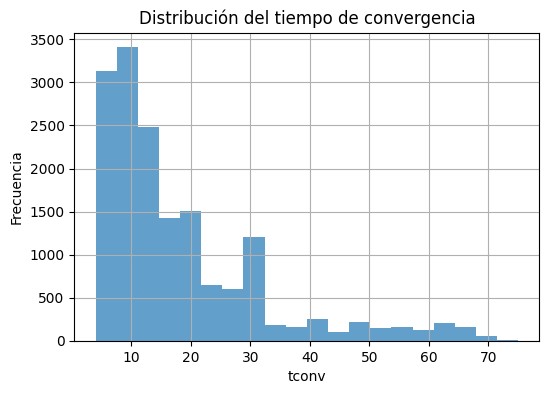

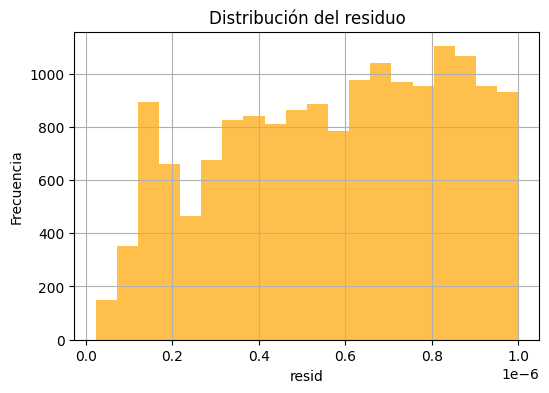

In [8]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["tconv"], bins=20, alpha=0.7)
plt.xlabel("tconv")
plt.ylabel("Frecuencia")
plt.title("Distribución del tiempo de convergencia")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df["resid"], bins=20, alpha=0.7, color='orange')
plt.xlabel("resid")
plt.ylabel("Frecuencia")
plt.title("Distribución del residuo")
plt.grid(True)
plt.show()




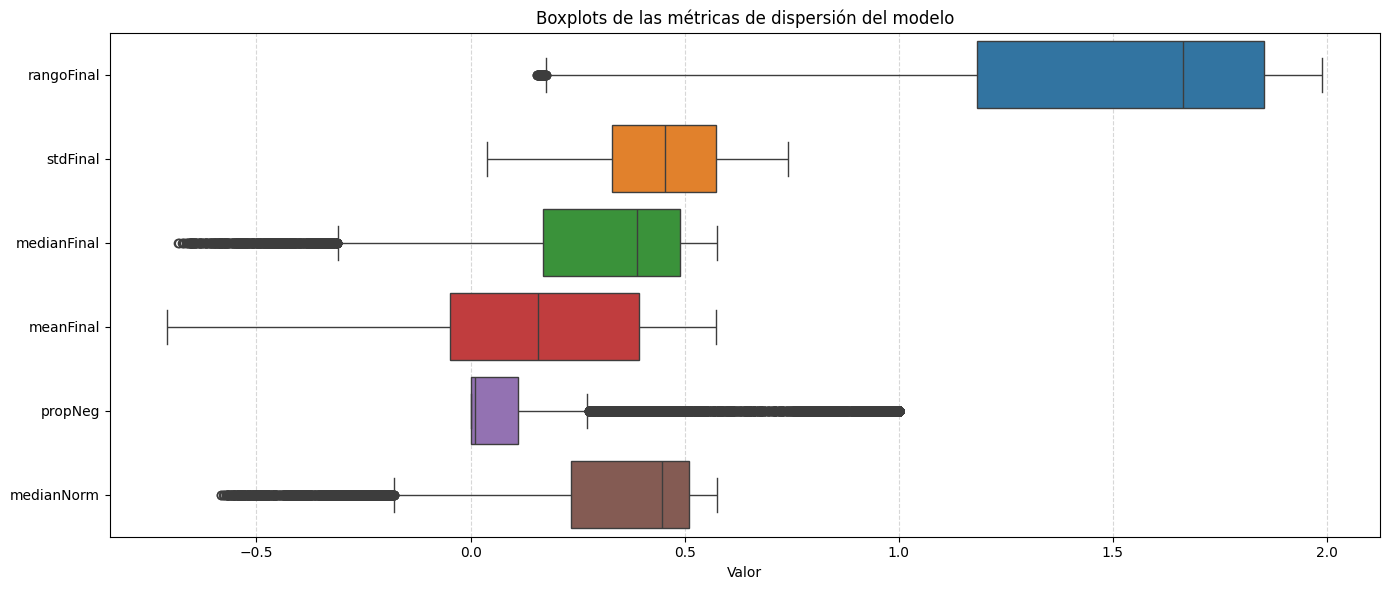

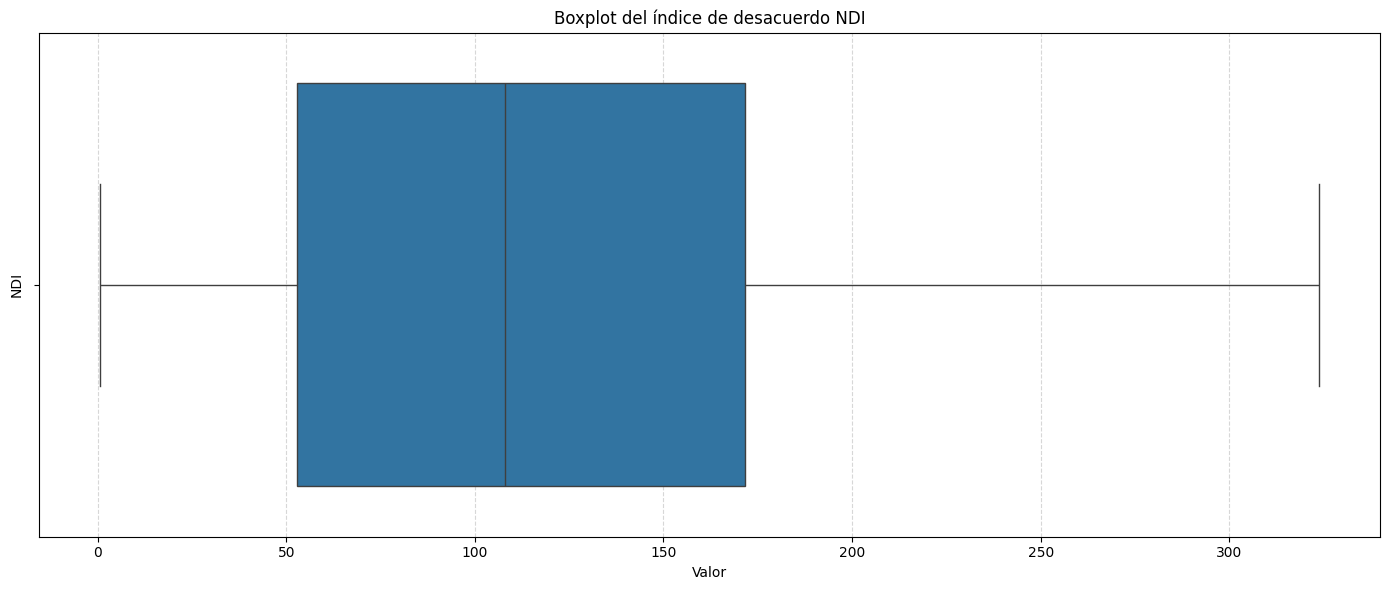

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas que quieres graficar
vars_to_plot = [
    "rangoFinal", "stdFinal", "medianFinal", "meanFinal",
    "propNeg", "medianNorm"
]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[vars_to_plot], orient="h")
plt.title("Boxplots de las métricas de dispersión del modelo")
plt.xlabel("Valor")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df["NDI"], orient="h")
plt.title("Boxplot del índice de desacuerdo NDI")
plt.xlabel("Valor")
plt.ylabel("NDI")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




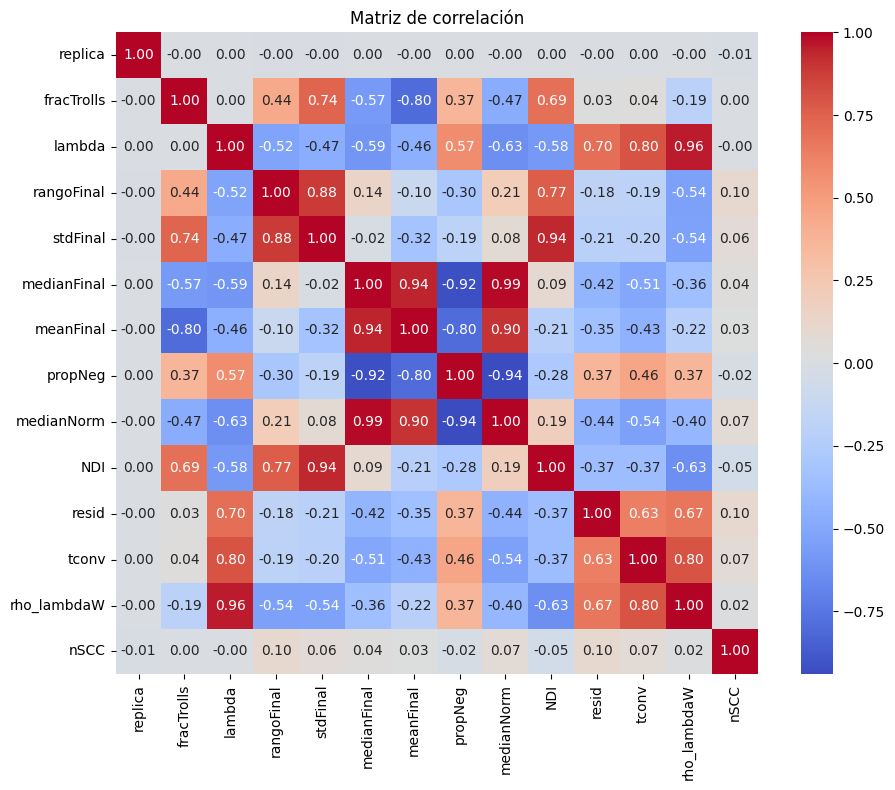

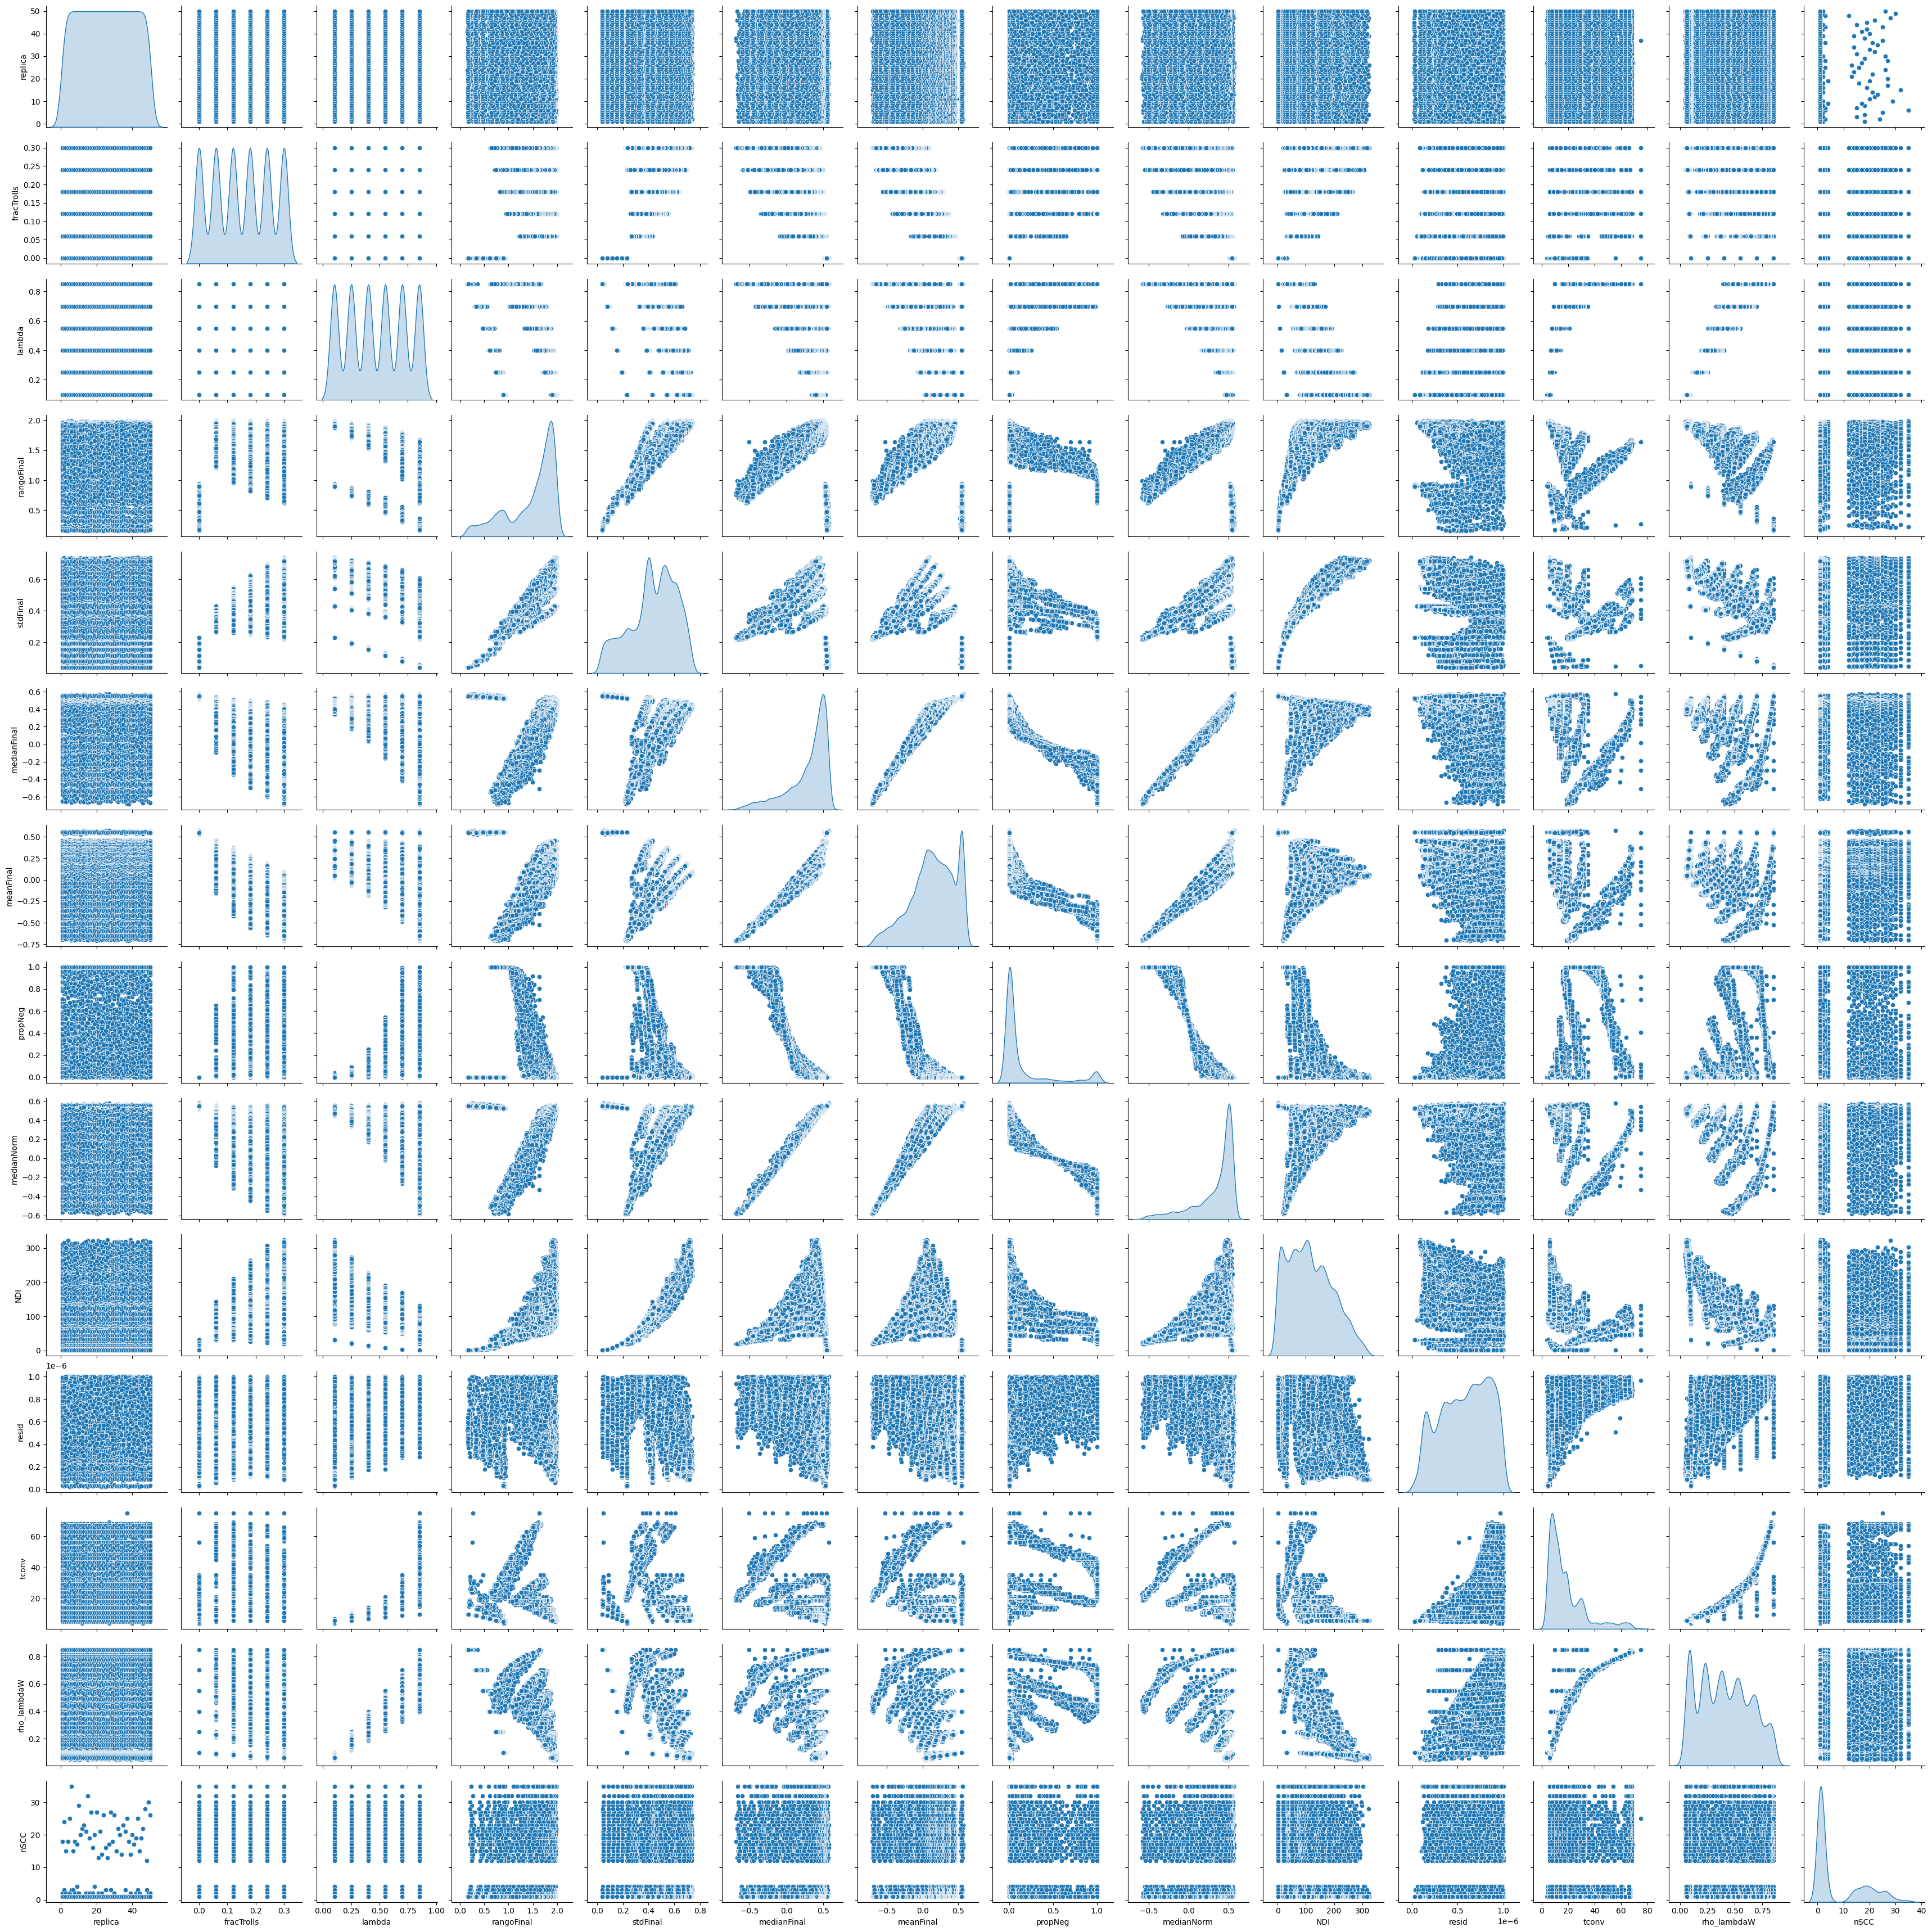

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.select_dtypes(include='number').corr()
numeric_cols = df.select_dtypes(include='number').columns


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()
sns.pairplot(df[numeric_cols], diag_kind="kde")
plt.show()


import numpy as np

# Umbral
threshold = 0.6

# Tomamos matriz absoluta
corr_abs = corr.abs()

# Para cada variable, comprobamos si tiene correlación > threshold con OTRA columna
vars_corr = corr_abs.columns[(corr_abs > threshold).sum(axis=0) > 1]



tablas

In [15]:
df.columns
key_vars = ['rangoFinal', 'stdFinal', 'medianFinal', 'meanFinal', 'propNeg',
       'medianNorm', 'NDI', 'resid', 'tconv', 'rho_lambdaW', 'nSCC']

In [17]:
df.columns

Index(['tag', 'replica', 'regimen', 'loc', 'fracTrolls', 'lambda',
       'rangoFinal', 'stdFinal', 'medianFinal', 'meanFinal', 'propNeg',
       'medianNorm', 'NDI', 'resid', 'tconv', 'rho_lambdaW', 'nSCC'],
      dtype='object')

In [19]:
df.groupby("regimen")[key_vars].agg(["mean", "std"]).round(3)
      

rangoFinal        stdFinal        medianFinal        meanFinal  \
                   mean    std     mean    std        mean    std      mean   
regimen                                                                       
desconectada      1.537  0.477    0.451  0.178       0.305  0.275     0.155   
fuerte            1.395  0.501    0.421  0.175       0.277  0.267     0.132   
umbral            1.461  0.491    0.432  0.176       0.287  0.272     0.140   

                    propNeg         ...      NDI         resid        tconv  \
                std    mean    std  ...     mean     std  mean  std    mean   
regimen                             ...                                       
desconectada  0.301   0.143  0.261  ...  109.771  72.825   0.0  0.0  19.628   
fuerte        0.312   0.156  0.321  ...  121.049  81.931   0.0  0.0  16.904   
umbral        0.308   0.152  0.290  ...  116.518  78.356   0.0  0.0  17.874   

                     rho_lambdaW          nSCC         
                 std        mean    std   mean    std  
regimen                                                
desconectada  15.323       0.414  0.236  20.74  5.325  
fuerte        12.849       0.404  0.226   1.00  0.000  
umbral        13.570       0.407  0.229   1.76  0.862  

[3 rows x 22 columns]

In [21]:
df.groupby("loc")[key_vars].agg(["median", "std"]).round(3)

rangoFinal        stdFinal        medianFinal        meanFinal         \
            median    std   median    std      median    std    median    std   
loc                                                                             
altoPR       1.577  0.498    0.409  0.171       0.308  0.321     0.101  0.346   
bajoPR       1.718  0.484    0.500  0.181       0.438  0.186     0.221  0.251   
medioPR      1.662  0.489    0.450  0.173       0.372  0.265     0.147  0.304   

        propNeg         ...      NDI          resid       tconv          \
         median    std  ...   median     std median  std median     std   
loc                     ...                                               
altoPR    0.035  0.348  ...  100.455  82.587    0.0  0.0   13.0  10.389   
bajoPR    0.000  0.191  ...  114.512  70.804    0.0  0.0   13.0  16.854   
medioPR   0.013  0.291  ...  108.313  79.838    0.0  0.0   13.0  13.638   

        rho_lambdaW          nSCC         
             median    std median    std  
loc                                       
altoPR        0.358  0.214    2.0  9.649  
bajoPR        0.413  0.241    2.0  9.649  
medioPR       0.400  0.228    2.0  9.649  

[3 rows x 22 columns]

In [22]:
df.groupby("lambda")[key_vars].mean().round(3)

rangoFinal  stdFinal  medianFinal  meanFinal  propNeg  medianNorm  \
lambda                                                                      
0.10         1.768     0.537        0.467      0.300    0.003       0.504   
0.25         1.685     0.506        0.432      0.265    0.010       0.478   
0.40         1.590     0.473        0.381      0.218    0.029       0.428   
0.55         1.468     0.432        0.305      0.153    0.080       0.351   
0.70         1.291     0.377        0.186      0.051    0.240       0.227   
0.85         0.983     0.283       -0.032     -0.132    0.542       0.001   

            NDI  resid   tconv  rho_lambdaW   nSCC  
lambda                                              
0.10    178.489    0.0   5.837        0.086  7.833  
0.25    154.625    0.0   8.649        0.215  7.833  
0.40    131.312    0.0  12.021        0.344  7.833  
0.55    106.951    0.0  16.744        0.473  7.833  
0.70     79.199    0.0  24.575        0.601  7.833  
0.85     44.102    0.0  40.986        0.730  7.833

In [23]:
df.groupby("fracTrolls")[key_vars].mean().round(3)

rangoFinal  stdFinal  medianFinal  meanFinal  propNeg  medianNorm  \
fracTrolls                                                                      
0.00             0.582     0.137        0.542      0.552    0.000       0.542   
0.06             1.738     0.379        0.418      0.340    0.031       0.430   
0.12             1.679     0.467        0.315      0.174    0.128       0.340   
0.18             1.631     0.517        0.230      0.041    0.196       0.275   
0.24             1.594     0.546        0.154     -0.074    0.250       0.223   
0.30             1.560     0.562        0.080     -0.177    0.296       0.179   

                NDI  resid   tconv  rho_lambdaW   nSCC  
fracTrolls                                              
0.00         12.703    0.0  11.037        0.475  7.833  
0.06         76.852    0.0  22.834        0.447  7.833  
0.12        118.825    0.0  20.892        0.418  7.833  
0.18        146.772    0.0  19.236        0.393  7.833  
0.24        164.738    0.0  17.954        0.369  7.833  
0.30        174.787    0.0  16.860        0.347  7.833

graficas

<Figure size 1200x600 with 0 Axes>

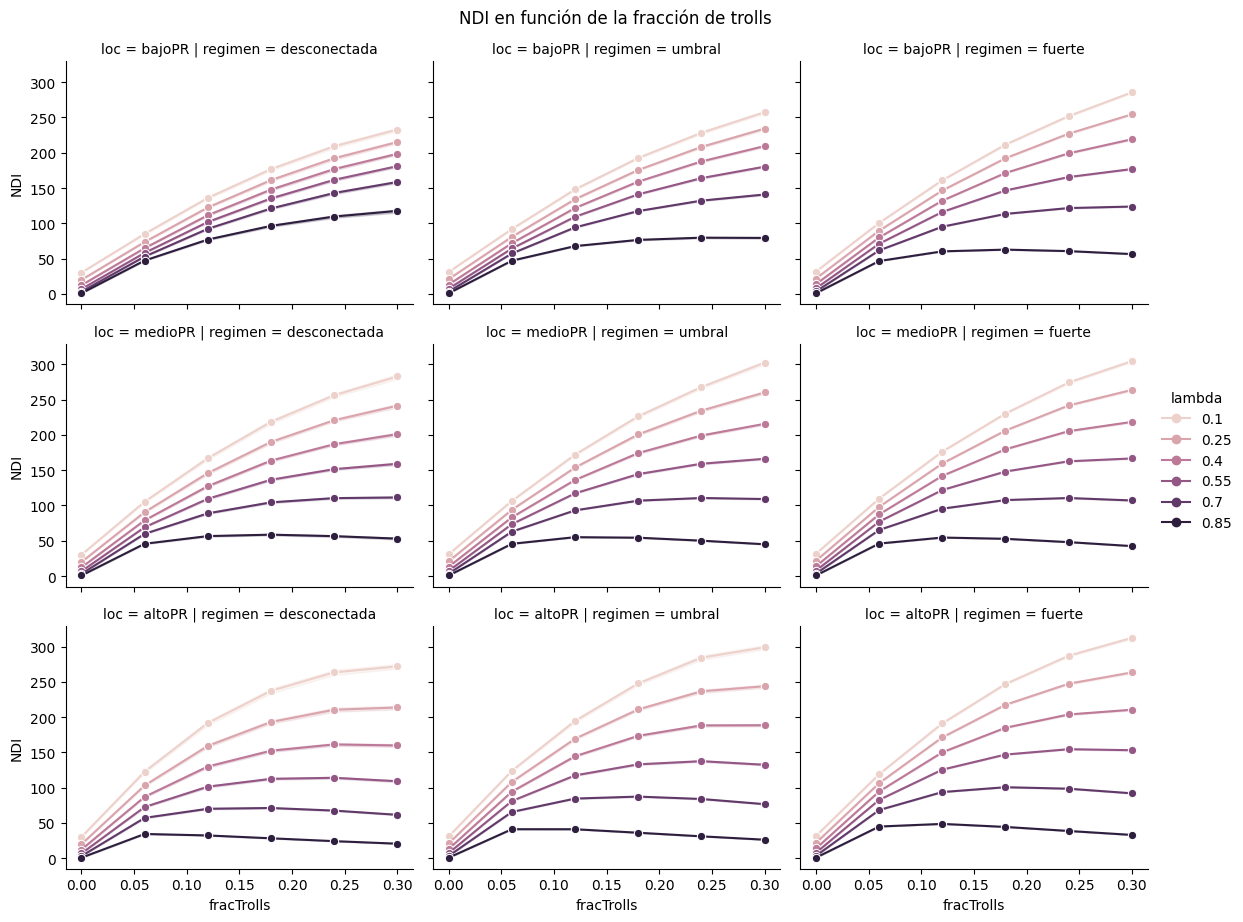

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.relplot(
    data=df,
    x="fracTrolls",
    y="NDI",
    col="regimen",
    row="loc",
    hue="lambda",
    kind="line",
    marker="o",
    height=3,
    aspect=1.3
)
plt.suptitle("NDI en función de la fracción de trolls", y=1.02)
plt.show()


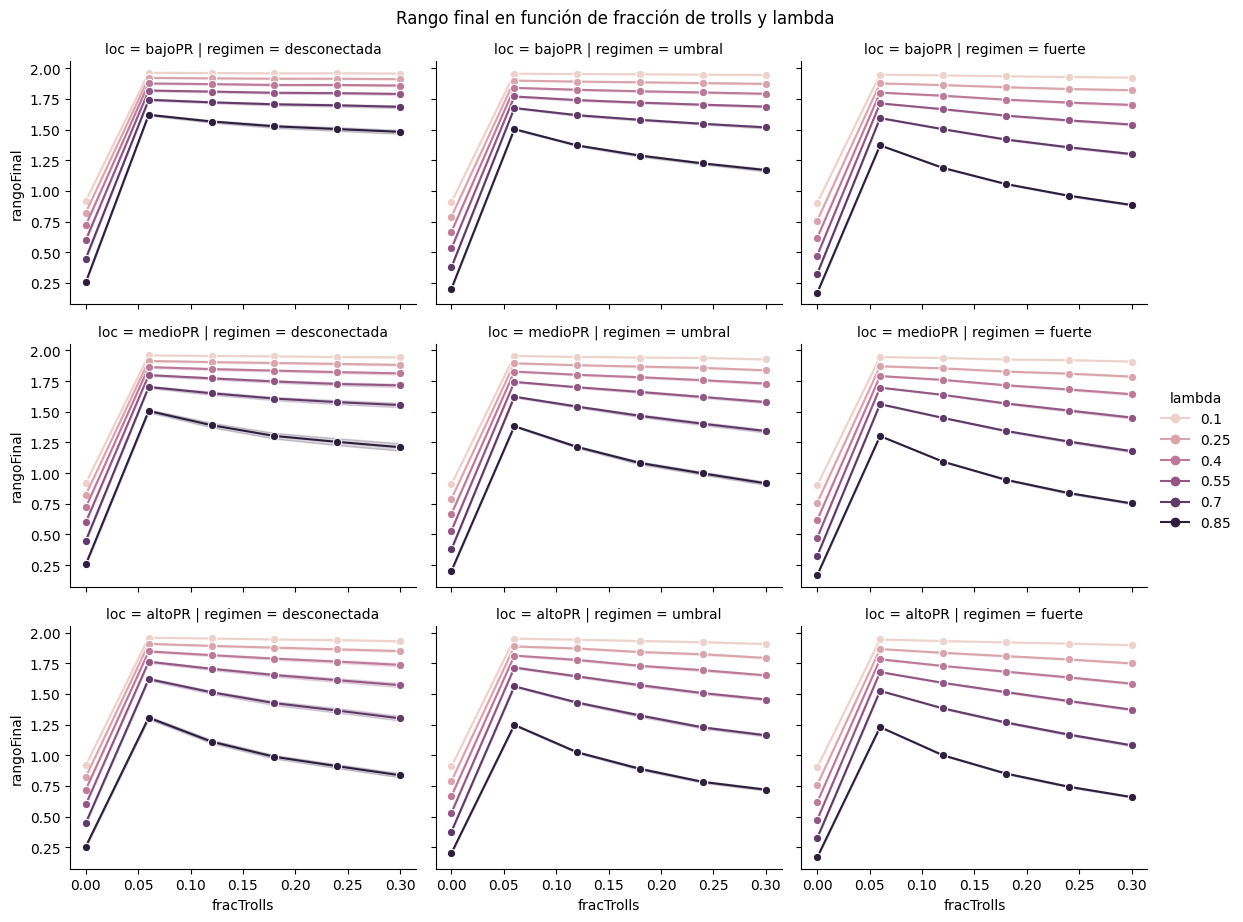

In [27]:
sns.relplot(
    data=df,
    x="fracTrolls",
    y="rangoFinal",
    col="regimen",
    row="loc",
    hue= "lambda",
    kind="line",
    marker= "o",
    height=3,
    aspect=1.3
)
plt.suptitle("Rango final en función de fracción de trolls y lambda", y=1.02)
plt.show()


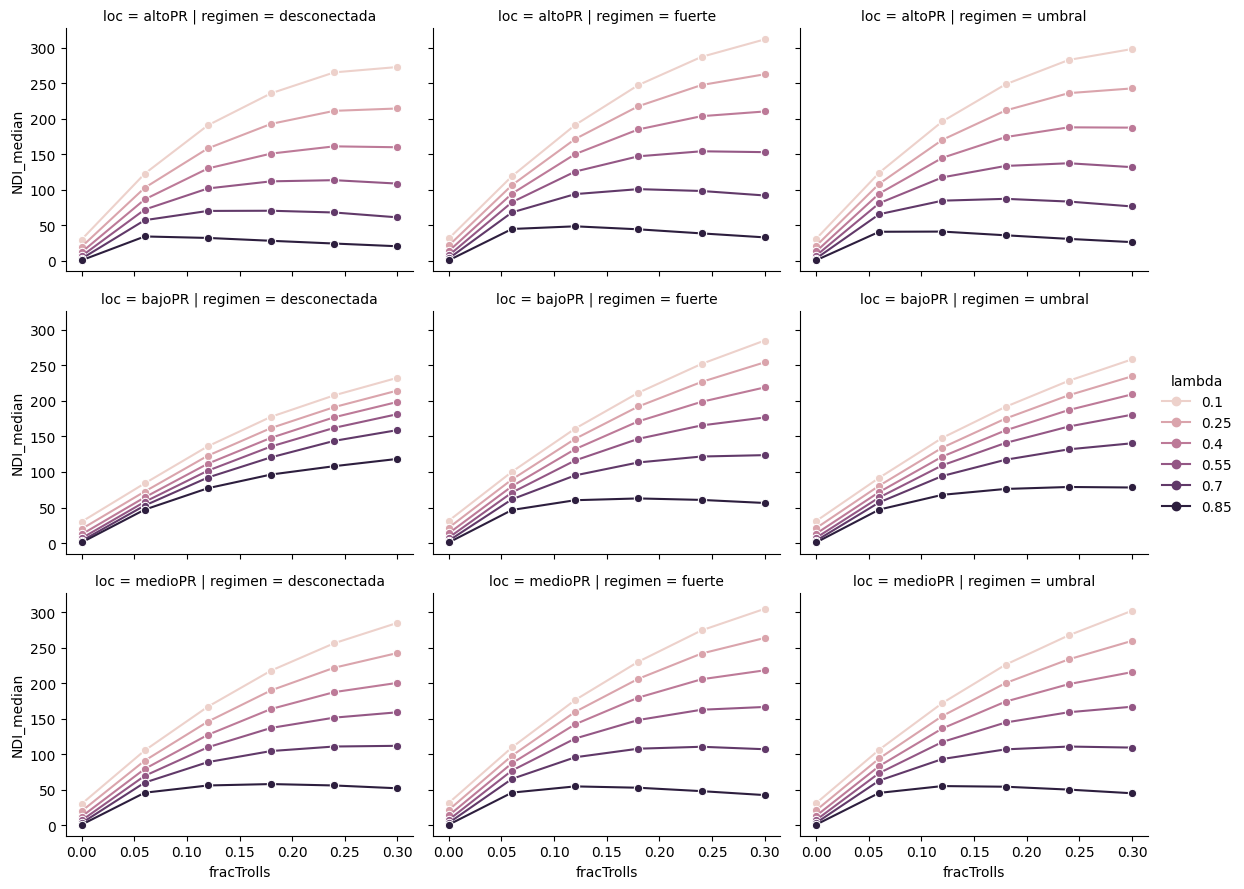

In [28]:
df_agg = df.groupby(
    ["fracTrolls", "lambda", "regimen", "loc"]
).agg(
    NDI_median=("NDI", "median"),
    NDI_std=("NDI", "std")
).reset_index()
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.relplot(
    data=df_agg,
    x="fracTrolls",
    y="NDI_median",
    col="regimen",
    row="loc",
    hue="lambda",
    kind="line",
    marker="o",
    height=3,
    aspect=1.3   
)




modelos

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd



# Convertir categóricas correctamente
df["regimen"] = df["regimen"].astype("category")
df["loc"] = df["loc"].astype("category")
df = df.rename(columns={"lambda": "lam"})

# Modelo general para NDI
model_NDI = smf.ols(
    "NDI ~ fracTrolls + lam + C(regimen) + C(loc)", data=df
).fit()

print(model_NDI.summary())


                            OLS Regression Results                            
Dep. Variable:                    NDI   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                 1.182e+04
Date:                Fri, 12 Dec 2025   Prob (F-statistic):               0.00
Time:                        21:23:09   Log-Likelihood:                -79920.
No. Observations:               16200   AIC:                         1.599e+05
Df Residuals:                   16193   BIC:                         1.599e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              112.4304 

In [36]:
model_var = smf.ols("stdFinal ~ fracTrolls + lam + C(regimen) + C(loc)", data=df).fit()
model_rango = smf.ols("rangoFinal ~ fracTrolls + lam + C(regimen) + C(loc)", data=df).fit()
model_median = smf.ols("medianFinal ~ fracTrolls + lam + C(regimen) + C(loc)", data=df).fit()
model_mean = smf.ols("meanFinal ~ fracTrolls + lam + C(regimen) + C(loc)", data=df).fit()
propNeg_model = smf.ols("propNeg ~ fracTrolls + lam + C(regimen) + C(loc)", data=df).fit()

In [40]:
print(model_var.summary())

print(model_mean.summary())
print(model_median.summary())
print(model_rango.summary())
print(propNeg_model.summary())


                            OLS Regression Results                            
Dep. Variable:               stdFinal   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     9970.
Date:                Fri, 12 Dec 2025   Prob (F-statistic):               0.00
Time:                        22:26:35   Log-Likelihood:                 17621.
No. Observations:               16200   AIC:                        -3.523e+04
Df Residuals:                   16193   BIC:                        -3.517e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3866 